In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/trash-amounts-tourist.csv', dtype={
    'Month': str,
    'CW': str,
    'Year': str,
    'Tour': str
})
df['Tonnage'] = pd.to_numeric(df['Tonnage'].str.replace(',', '.'))

df.head()

,Month,CW,Year,Date,Yard,Shift,Tour,Tonnage,Type,Tour_Arrivals,Tour_Stays,Avg_Daily_Arrivals,Avg_Daily_Stays
0,1,1,2019,02.01.19,VMF,1,1,5.59,BIO,914931.0,2159841.0,29514.0,69672.0
1,1,1,2019,02.01.19,VMF,1,4,3.23,BIO,914931.0,2159841.0,29514.0,69672.0
2,1,1,2019,02.01.19,VMF,1,5,5.68,BIO,914931.0,2159841.0,29514.0,69672.0
3,1,1,2019,02.01.19,VMF,1,6,5.48,BIO,914931.0,2159841.0,29514.0,69672.0
4,1,1,2019,02.01.19,VMF,1,7,7.84,BIO,914931.0,2159841.0,29514.0,69672.0


In [3]:
# Get unique trash type
unique_types = df['Type'].unique()

# Add a column for each year
for type in unique_types:
    column_name = f"Type_{type}"
    df[column_name] = df['Type'] == type

df.head()

,Month,CW,Year,Date,Yard,Shift,Tour,Tonnage,Type,Tour_Arrivals,Tour_Stays,Avg_Daily_Arrivals,Avg_Daily_Stays,Type_BIO,Type_HM,Type_SPM Sammlung
0,1,1,2019,02.01.19,VMF,1,1,5.59,BIO,914931.0,2159841.0,29514.0,69672.0,True,False,False
1,1,1,2019,02.01.19,VMF,1,4,3.23,BIO,914931.0,2159841.0,29514.0,69672.0,True,False,False
2,1,1,2019,02.01.19,VMF,1,5,5.68,BIO,914931.0,2159841.0,29514.0,69672.0,True,False,False
3,1,1,2019,02.01.19,VMF,1,6,5.48,BIO,914931.0,2159841.0,29514.0,69672.0,True,False,False
4,1,1,2019,02.01.19,VMF,1,7,7.84,BIO,914931.0,2159841.0,29514.0,69672.0,True,False,False


                   Type_BIO   Type_HM  Type_SPM Sammlung   Tonnage
Type_BIO           1.000000 -0.840846          -0.131992 -0.397878
Type_HM           -0.840846  1.000000          -0.425554  0.580668
Type_SPM Sammlung -0.131992 -0.425554           1.000000 -0.398200
Tonnage           -0.397878  0.580668          -0.398200  1.000000


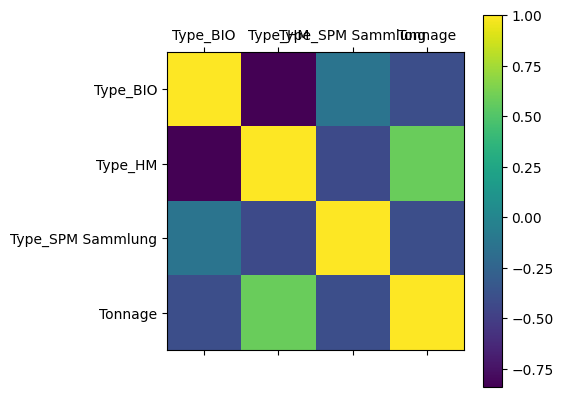

In [4]:
# Identify columns that contain 'tour' (case-insensitive)
month_columns = [col for col in df.columns if 'type_' in col.lower()]

# Ensure 'Tonnage' is included
columns_to_include = month_columns + ['Tonnage']

# Calculate the correlation matrix for these columns
corr_matrix = df[columns_to_include].corr()

print(corr_matrix)


plt.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()


In [5]:
type_df = df[['Date', 'Type', 'Tonnage']]

type_df.head()

,Date,Type,Tonnage
0,02.01.19,BIO,5.59
1,02.01.19,BIO,3.23
2,02.01.19,BIO,5.68
3,02.01.19,BIO,5.48
4,02.01.19,BIO,7.84


In [6]:
grouped_type_df = df.groupby(['Date', 'Type'], as_index=False)['Tonnage'].sum()
grouped_type_df.head()

,Date,Type,Tonnage
0,01.02.19,BIO,304.45
1,01.02.19,HM,2854.95
2,01.02.19,SPM Sammlung,44.68
3,01.02.21,BIO,129.81
4,01.02.21,HM,3672.56


In [7]:
# Get unique trash type
unique_types = df['Type'].unique()

# Add a column for each year
for type in unique_types:
    column_name = f"Type_{type}"
    grouped_type_df[column_name] = grouped_type_df['Type'] == type

grouped_type_df.head()

,Date,Type,Tonnage,Type_BIO,Type_HM,Type_SPM Sammlung
0,01.02.19,BIO,304.45,True,False,False
1,01.02.19,HM,2854.95,False,True,False
2,01.02.19,SPM Sammlung,44.68,False,False,True
3,01.02.21,BIO,129.81,True,False,False
4,01.02.21,HM,3672.56,False,True,False


In [8]:
matrix = grouped_type_df[['Tonnage', 'Type_BIO', 'Type_HM', 'Type_SPM Sammlung']].corr()
print(matrix)

                    Tonnage  Type_BIO   Type_HM  Type_SPM Sammlung
Tonnage            1.000000 -0.344379  0.952257          -0.592933
Type_BIO          -0.344379  1.000000 -0.473569          -0.512463
Type_HM            0.952257 -0.473569  1.000000          -0.513627
Type_SPM Sammlung -0.592933 -0.512463 -0.513627           1.000000


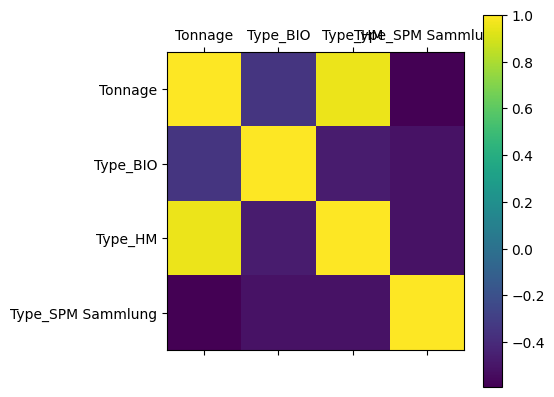

In [9]:
plt.matshow(matrix)
plt.xticks(range(len(matrix.columns)), matrix.columns)
plt.yticks(range(len(matrix.columns)), matrix.columns)
plt.colorbar()
plt.show()